In [29]:
import warnings
warnings.filterwarnings('ignore')

<img style ="float:left" width=240 height=240 src="images/red-brain.jpg"/>

### <div align="right">Brainhack School 2020 Project</div>###

# <div align="right">**Can Gender be Identified Using fMRI?**</div>

### <div align="right">by _Tajwar Sultana_ </div>




# **Inspiration**

- [Functional Connectivity Predicts Gender: Evidence for Gender Differences in Resting State Connectivity](https://onlinelibrary.wiley.com/doi/epdf/10.1002/hbm.23950)

- [Sex Classification by Resting State Brain Connectivity](https://academic.oup.com/cercor/article/30/2/824/5524764)



# BOLD contrast and fMRI Time Series 


  <img src="images/time series.jfif" align="center" width=520 height=520>
  


###### Image Courtesy: https://ernsi2017.sciencesconf.org/data/pages/ERNSIpresentation_GiuliaPrando.pdf

# Functional Connectivity

<img src="images/FC.jpeg" width=520 height=520 align="left"/>

<img src="images/FC2.jpeg" width=520 height=520 align="center"/>

# Dataset

- Nilearn Development Dataset
- 155 Subjects
- Functional Images => Used to form features
- Phenotypic Data => Used to form Labels

# ROI Time Series

- datasets.fetch_atlas_basc_multiscale_2015
- Resolution = 64

<img src = "images/atlas.png">

# Connectivity Matrix

<img src = "images/single.png" width = 520>

# Connectome

- Mean Correlation Matrix
<img src="images/connectome.png">

In [1]:
import pickle
import os

pickle_in = open(os.path.join(os.path.abspath('..'),"Data/features.pickle"),"rb")
df_features = pickle.load(pickle_in)
pickle_in.close()


# Features DataFrame

In [7]:
print(df_features.shape)
df_features.head()

(155, 2016)


,0,1,2,3,4,5,6,7,8,9,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0.232860,-0.043625,0.092009,0.465798,0.295241,0.091350,0.000028,-0.000019,0.000017,-0.000013,...,0.377468,0.135321,0.214588,0.449405,0.231941,0.387250,0.166260,0.551690,0.378682,0.475202
1,0.467246,-0.119457,-0.062547,0.472326,0.376036,0.035121,0.000221,0.000038,-0.000191,0.000221,...,0.072512,0.272233,-0.032882,0.391810,0.232658,0.548074,-0.242473,0.032048,0.095475,0.230578
2,0.448596,0.130983,0.316571,0.662571,0.272684,0.098411,-0.023168,-0.069897,0.066056,0.024636,...,0.516681,0.628576,0.405334,0.591906,0.656595,0.554171,0.376697,0.512734,0.457288,0.640499
3,0.236547,0.048036,0.002236,0.448658,0.142590,0.068359,-0.053419,-0.029784,0.014794,0.036110,...,-0.070190,0.530982,0.072605,0.175955,0.194926,0.170638,0.191752,0.135061,0.135847,0.368537
4,0.244007,0.083132,0.342197,0.341674,-0.076095,-0.086215,0.135303,-0.107674,-0.012754,0.168019,...,0.278559,0.092597,0.269093,0.413449,0.128707,0.338674,0.145776,0.345804,0.177099,0.419354


<img src="images/allfeatures_correlation.png" width=800 height=1000>

In [8]:
from nilearn import datasets
import pandas as pd
data = datasets.fetch_development_fmri()
pheno = data.phenotypic
pheno = pd.DataFrame(pheno)

# Labels DataFrame

In [9]:
pheno.head()

,participant_id,Age,AgeGroup,Child_Adult,Gender,Handedness
0,sub-pixar123,27.06,Adult,adult,F,R
1,sub-pixar124,33.44,Adult,adult,M,R
2,sub-pixar125,31.00,Adult,adult,M,R
3,sub-pixar126,19.00,Adult,adult,F,R
4,sub-pixar127,23.00,Adult,adult,F,R


In [10]:
df_labels = pd.DataFrame(pheno['Gender'])
df_labels.head()

,Gender
0,F
1,M
2,M
3,F
4,F


# Label Encoding

In [11]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df_labels.values)
df_labels = pd.DataFrame(data=le.transform(df_labels.values),columns=['Gender'])


/home/tjays/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tjays/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
print(le.classes_)

['F' 'M']


In [13]:
df_labels.head()

,Gender
0,0
1,1
2,1
3,0
4,0


# Labels Count


In [14]:
import plotly
import cufflinks as cf
cf.go_offline() 

In [15]:
df_labels['Gender'].value_counts().iplot(kind='bar', xaxis_title="Gender", yaxis_title="Count")

In [16]:
df_labels['Gender'].value_counts()

0    84
1    71
Name: Gender, dtype: int64

# Relationship between Features

<img src="images/pairplot.png" width=720 height=480/>

# Dimensionality Reduction

## Principal Component Analysis (PCA)

In [17]:
from sklearn.decomposition import PCA
import ipywidgets as widgets
import plotly.express as xp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg

pca = PCA(.95)
x_pca = pca.fit_transform(df_features)

df_pca = pd.DataFrame(x_pca)

pc1 = widgets.IntSlider(min = 1, max = 100, value = 1, description = "PC #")
pc2 = widgets.IntSlider(min = 1, max = 100, value = 1, description = "PC #")

def update_pcplot(pc1, pc2):
    ax.clear()
    
    img = ax.scatter(x_pca[:,pc1],x_pca[:,pc2],c = df_labels['Gender'])
    ax.set(xlabel = ('Principal Component', pc1))
    ax.set(ylabel = ('Principal Component', pc2))
   # ax.legend()
    ax.legend(handles=img.legend_elements()[0], labels=['Female','Male'])#*img.legend_elements())


In [19]:
print(x_pca.shape)

(155, 110)


<IPython.core.display.Javascript object>


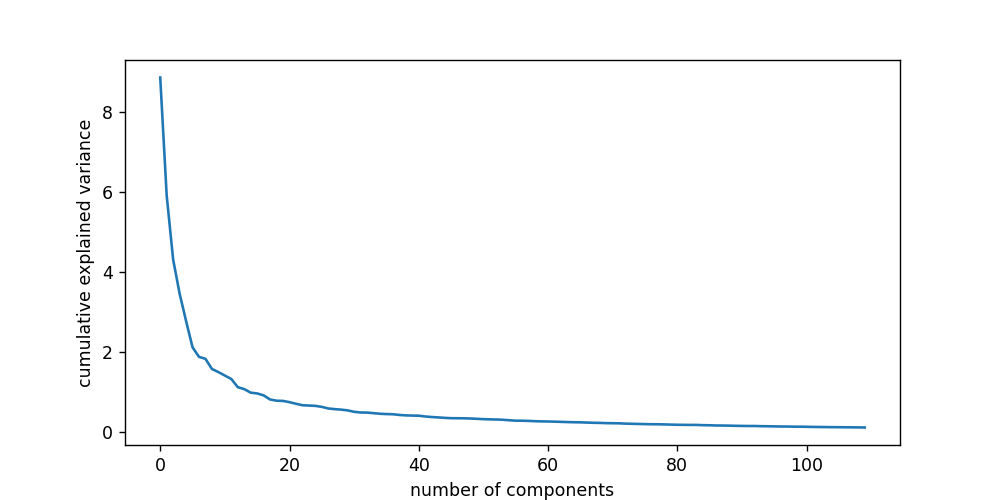

In [27]:
fig, ax = plt.subplots(1, figsize = (8,4))
ax.plot(pca.explained_variance_)
ax.set(xlabel = 'number of components')
ax.set(ylabel = 'cumulative explained variance')
fig.show()

<IPython.core.display.Javascript object>


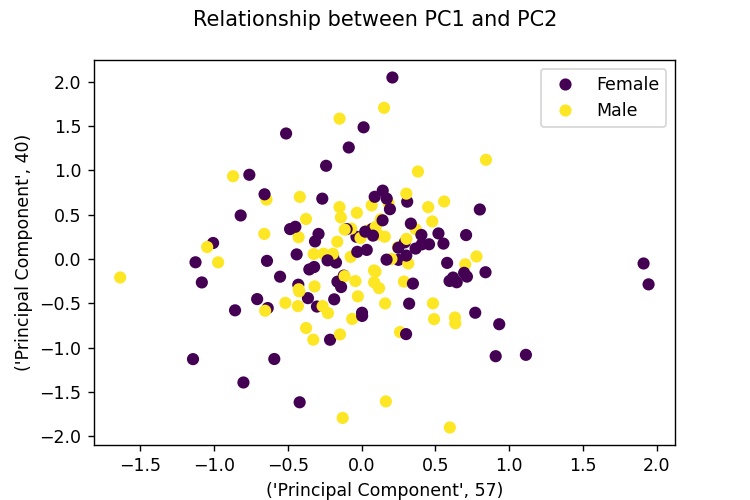

interactive(children=(IntSlider(value=57, description='PC #', min=1), IntSlider(value=40, description='PC #', …

In [28]:
fig, ax = plt.subplots(1, figsize=(6,4))
fig.suptitle("Relationship between PC1 and PC2")
widgets.interactive(update_pcplot, pc1 = pc1, pc2 = pc2)

# Training and Testing Sets

<img src="images/traintest.png">


In [15]:
import import_ipynb
import ML

train_test = ML.train_test()
X_train, X_test, y_train, y_test = train_test.train_test_sets(df_pca, df_labels)

importing Jupyter notebook from ML.ipynb
training: 108 testing: 47


# Classifiers with 10-fold Cross-Validation

- Logistic Regression
- K-Nearest Neighbors 
- Multilayer Perceptron
- Gaussian Naive Bayes
- Decision Tree
- Random Forest

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import sys
#sys.path.append('/e/bhs2020/bhs-proj/')
#from Code import ML

metrics = ML.ML_metrics()

# Names of Classifiers

clf_names = ['Logistic Regression', 
             'K-Nearest Neighbors', 
             'Multilayer Perceptron', 
             'Gaussian Naive Bayes', 
             'Decision Tree', 
             'Random Forest']
        
# Classifiers Initiation

classifiers = [LogisticRegression(random_state = 0),
               KNeighborsClassifier(n_neighbors = 3),
               MLPClassifier(hidden_layer_sizes=(2, 4), random_state=1),
               GaussianNB(),
               DecisionTreeClassifier(max_depth = 3),
               RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1)]




# Classification Metrics

Logistic Regression


Accuracy of Logistic Regression: 0.5863636363636363
Area Under Curve of Logistic Regression: 0.6155
f1 score of Logistic Regression: 0.5163636363636364
Confusion_matrix [[38 21]
 [24 25]]


<IPython.core.display.Javascript object>


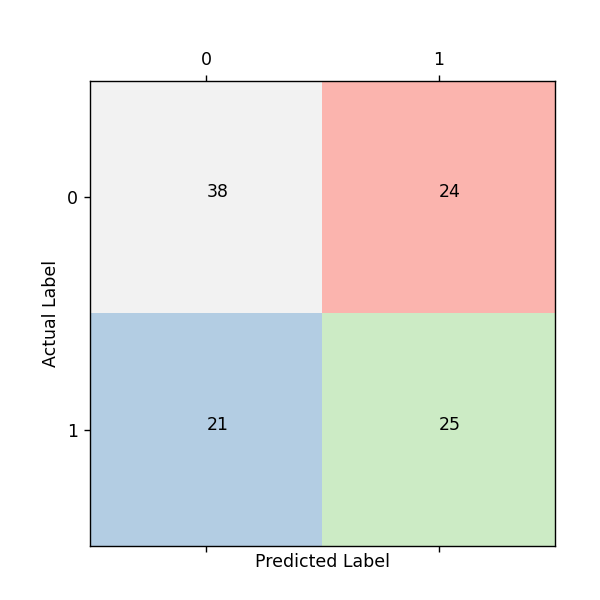

True Negative =  38
False Negative =  21
False Positive =  24
True Positive =  25


K-Nearest Neighbors


Accuracy of K-Nearest Neighbors: 0.5118181818181818
Area Under Curve of K-Nearest Neighbors: 0.49016666666666675
f1 score of K-Nearest Neighbors: 0.4735997335997336
Confusion_matrix [[32 27]
 [26 23]]


<IPython.core.display.Javascript object>


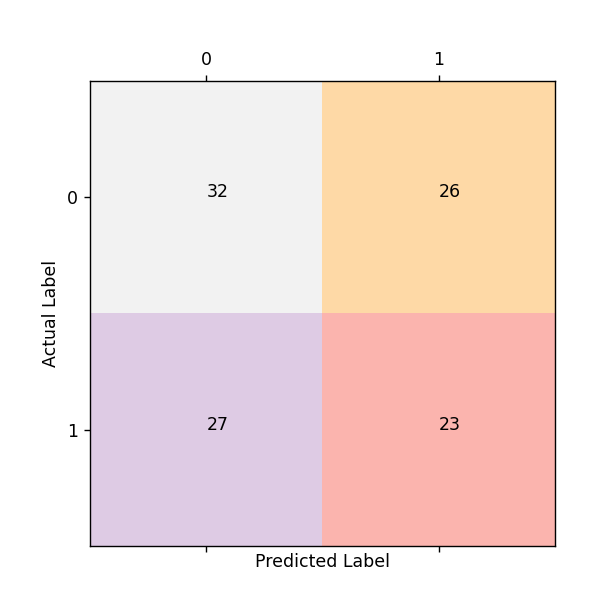

True Negative =  32
False Negative =  27
False Positive =  26
True Positive =  23


Multilayer Perceptron


Accuracy of Multilayer Perceptron: 0.6027272727272727
Area Under Curve of Multilayer Perceptron: 0.5933333333333334
f1 score of Multilayer Perceptron: 0.47248196248196245
Confusion_matrix [[45 14]
 [29 20]]


<IPython.core.display.Javascript object>


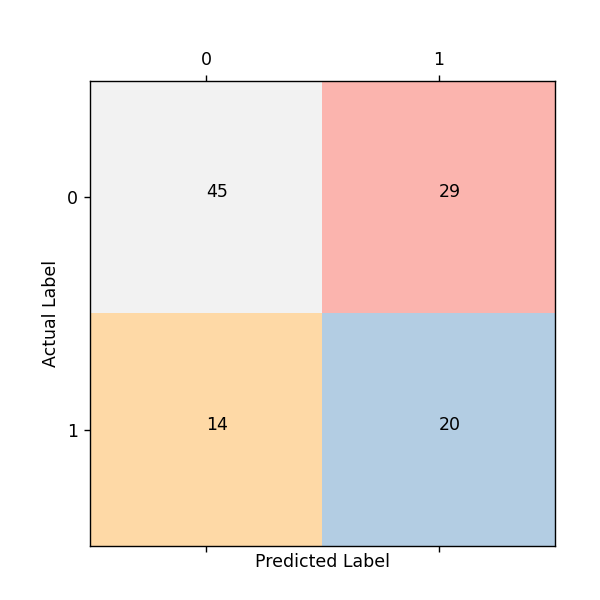

True Negative =  45
False Negative =  14
False Positive =  29
True Positive =  20


Gaussian Naive Bayes


Accuracy of Gaussian Naive Bayes: 0.4718181818181818
Area Under Curve of Gaussian Naive Bayes: 0.4878333333333333
f1 score of Gaussian Naive Bayes: 0.32062937062937064
Confusion_matrix [[35 24]
 [33 16]]


<IPython.core.display.Javascript object>


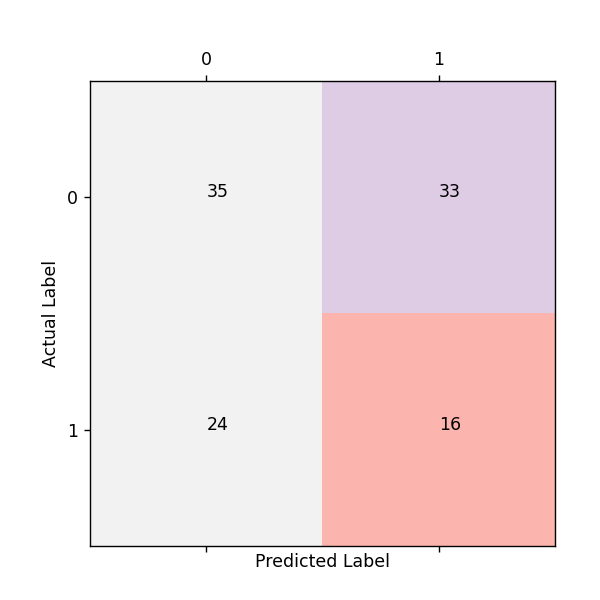

True Negative =  35
False Negative =  24
False Positive =  33
True Positive =  16


Decision Tree


Accuracy of Decision Tree: 0.5509090909090909
Area Under Curve of Decision Tree: 0.542
f1 score of Decision Tree: 0.5261266511266511
Confusion_matrix [[30 29]
 [24 25]]


<IPython.core.display.Javascript object>


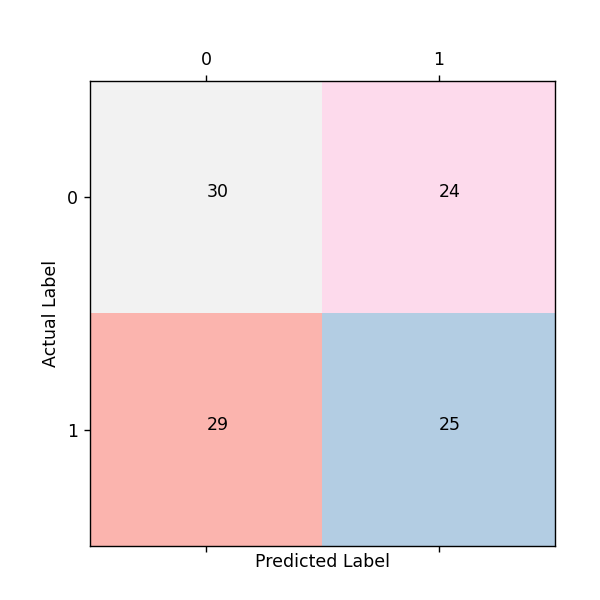

True Negative =  30
False Negative =  29
False Positive =  24
True Positive =  25


Random Forest


Accuracy of Random Forest: 0.5536363636363637
Area Under Curve of Random Forest: 0.5245
f1 score of Random Forest: 0.35492063492063497
Confusion_matrix [[43 16]
 [31 18]]


<IPython.core.display.Javascript object>


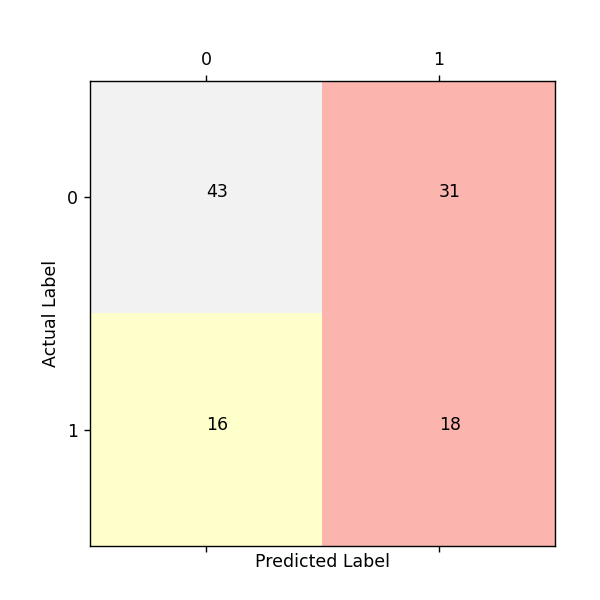

True Negative =  43
False Negative =  16
False Positive =  31
True Positive =  18




In [17]:
y_pred, acc, roc_auc, f1 = metrics.metrics(X_train, y_train, clf_names, classifiers)

<img src="images/goals.jpg" align="right" width=320 height=520/>

# Future Goals
- Improving classification accuracy by selecting those networks whose connectivity differ between male and female
- Explore Nilearn => RegionExtractor, Masker, plotting, atlases, seed based FC
- Containerization using Docker
- More of Interactive plotting

# <div align="center">Thankyou Brainhack!!!</div>